JMJ+

**Problem Statement**
- Analyse the per page view pattern of users for different wikipedia page for 550 days

- Forecasting the ad views based on the historical data so as to optimise the ad positioning and thereby improving the client service and generating more revenue.

## Table of Contents

1. **[Import libraries](#import_lib)**
2. **[Read data & basic checks](#Read_Data)**
    - 2.1 - [Observations from basic checks](#obs_basic)
3. **[Preprocessing the data](#Data_pr)**
4. **[Basic plots](#B_plt)**
    - 4.1 - [Observation from basic plot](#obs_basic_plt)
5. **[Plotting languages indvidually to study their trend](#plt_indi)**
    - 5.1 - [Observation based on trend](#obs_trend)
6. **[Checking stationarity](#chk_stat)**
    - 6.1 - [Observation based on ADF Test](#obs_adf)
7. **[Decomposition](#decom)**
    - 7.1 - [Observation based on decomposition](#obs_decom)
8. **[Differencing](#diff)**
    - 8.1 - [Observation based on differencing](#obs_diff)
9. **[ACF and PACF plot](#acf_pacf)**
    - 9.1 - [Observation from ACF and PACF plots](#obs_acf_pacf)
10. **[Forecasting using ARIMA](#arima_for)**
    - 10.1 - [Gridsearch using ARIMA](#arima_grid)
    - 10.2 - [Observations from ARIMA forecasting](#arima_forecast_obs)
11. **[Creating model and forecasting with SARIMAX](#sarimax_for)**
    - 11.1 - [Observations from SARIMAXARIMA forecasting](#sarimax_obs)
12. **[Forecasting using Facebook prophet](#prophet)**
13. **[Creating a pipeline for working with multiple series](#pipe_line)**
14. **[Insights](#ins)**
15. **[Reccomendations](#rec)**
16. **[Questionnaire](#ques)**

### 1. Import libraries <a id='import_lib'></a> 

In [1]:
import numpy as np
import pandas as pd

import statsmodels.api as sm

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_percentage_error as mape

from statsmodels.tsa.statespace.sarimax import SARIMAX

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import re

### 2. Read data & basic checks <a id='Read_Data'></a> 

In [105]:
# Reading the input files and converting into dataframe

path1=r'C:\Users\Alfred Paul\OneDrive\Desktop\Scaler_CaseStudies\Dataset\train_1.csv'
path2=r'C:\Users\Alfred Paul\OneDrive\Desktop\Scaler_CaseStudies\Dataset\Exog_Campaign_eng.csv'

df=pd.read_csv(path1)
df_exog=pd.read_csv(path2)

**Basic checks**

In [3]:
df.head(3)

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0


In [4]:
# Exog file

df_exog.head(3)

,Exog
0,0
1,0
2,0


In [6]:
# Checking the shape

df.shape

(145063, 551)

In [7]:
# Basic info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


In [8]:
# Stats of differnt columns:

df.describe()

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
count,1.243230e+05,1.242470e+05,1.245190e+05,1.244090e+05,1.244040e+05,1.245800e+05,1.243990e+05,1.247690e+05,1.248190e+05,1.247210e+05,...,1.412100e+05,1.414790e+05,1.418740e+05,1.413190e+05,1.411450e+05,1.413620e+05,1.412410e+05,1.412370e+05,1.414280e+05,1.415980e+05
mean,1.195857e+03,1.204004e+03,1.133676e+03,1.170437e+03,1.217769e+03,1.290273e+03,1.239137e+03,1.193092e+03,1.197992e+03,1.189651e+03,...,1.394096e+03,1.377482e+03,1.393099e+03,1.523740e+03,1.679607e+03,1.678302e+03,1.633966e+03,1.684308e+03,1.467943e+03,1.478282e+03
std,7.275352e+04,7.421515e+04,6.961022e+04,7.257351e+04,7.379612e+04,8.054448e+04,7.576288e+04,6.820002e+04,7.149717e+04,7.214536e+04,...,8.574880e+04,7.732794e+04,8.478533e+04,8.752210e+04,9.794534e+04,9.232482e+04,9.185831e+04,9.014266e+04,8.155481e+04,8.873567e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.300000e+01,1.300000e+01,1.200000e+01,1.300000e+01,1.400000e+01,1.100000e+01,1.300000e+01,1.300000e+01,1.400000e+01,1.400000e+01,...,2.200000e+01,2.200000e+01,2.000000e+01,2.100000e+01,2.200000e+01,2.300000e+01,2.400000e+01,2.300000e+01,2.300000e+01,2.100000e+01
50%,1.090000e+02,1.080000e+02,1.050000e+02,1.050000e+02,1.130000e+02,1.130000e+02,1.150000e+02,1.170000e+02,1.150000e+02,1.130000e+02,...,1.490000e+02,1.430000e+02,1.320000e+02,1.450000e+02,1.600000e+02,1.620000e+02,1.630000e+02,1.600000e+02,1.540000e+02,1.360000e+02
75%,5.240000e+02,5.190000e+02,5.040000e+02,4.870000e+02,5.400000e+02,5.550000e+02,5.510000e+02,5.540000e+02,5.490000e+02,5.450000e+02,...,6.070000e+02,5.980000e+02,5.690000e+02,6.280000e+02,6.590000e+02,6.680000e+02,6.540000e+02,6.490000e+02,6.350000e+02,5.610000e+02
max,2.038124e+07,2.075219e+07,1.957397e+07,2.043964e+07,2.077211e+07,2.254467e+07,2.121089e+07,1.910791e+07,1.999385e+07,2.020182e+07,...,2.420108e+07,2.253925e+07,2.505662e+07,2.586575e+07,2.834288e+07,2.691699e+07,2.702505e+07,2.607382e+07,2.436397e+07,2.614954e+07


In [9]:
# Checking the null value

df.isnull().sum().head(3)

Page              0
2015-07-01    20740
2015-07-02    20816
dtype: int64

In [10]:
# Checking duplicate count  

df.duplicated().sum()

0

**2.1 Observations from basic checks <a id='obs_basic'></a>**

- The dataset consist of **145063 rows and 551 columns**
- The rows contains different **wikipedia pages** details within the date window of **2015-07-01 to 2016-12-31**
- All the dates are consecutive and there are **no missing dates** within the gived window
- Using the describe function all the required details coulnot be obtained and needs further processing
- There are **null values** for most of the dates--> need deeper analysis and processing
- There are **no duplicated rows** in the dataset


### 3. Preprocessing the data <a id='Data_pr'></a> 


---
**Handling null values**
- Null values can occur due to 2 reasons:
            1. The page has not yet added/created
            2. There were no views/value is missing
           
- **Reason 1** 

- can be identified if null values are present consecutively from the starting date and at some date, non values are available
- This condition is handled by keeping all the null values from the starting date till the first non null date to 0 
<br>
- **Reason 2**
- Handled using linear interpolation


**Note**
- If all the dates have null values, they are also replaced with 0 


---
**Extracting Languages**

<br>
- Language code is extracted using regex function
- Language code is replaced with the corresponding language

---
**Extracting 'ACCESS TYPE'**
<br>
- 'ACCESS TYPE' is extracted using regex function

---
**Extracting 'ACCESS ORIGIN'**
<br>
- 'ACCESS ORIGIN' is extracted using regex function


            

In [11]:
df1=df.copy()
# df1.head(3)

In [12]:
# Function to handle np.nan values
def first_valid(x):
    
    if x.first_valid_index() is None:
        x[:]=x[:].replace(np.nan,0)        
        return x
    else:
        till_index=x.first_valid_index()                 
        x[:till_index]=x[:till_index].replace(np.nan,0)        
        return x
    
# Function to extract the language    
def get_language(page):
    res = re.search('[a-z][a-z].wikipedia.org',page)
    if res:
        return res[0][0:2]
    return 'Other'

# Function to extract the ACCESS TYPE    
def acc_type(page):
    res = re.findall('.org_[(A-Z)|(a-z)|-]+_',page)
    res = res[-1][5:-1]
#     res = re.search('.org_[(A-Z)|(a-z)|-]+_',page)
    if(res=='all-access' or res=='mobile-web' or res=='desktop'):
        return res
    return 'Other'

# Function to extract the ACCESS ORIGIN    
def acc_origin(page):
    res = re.findall('_[(A-Z)|(a-z)|-]+',page)
    if res:
        return res[-1][1:]                
    return 'Other'
    

In [13]:
df1 = df1.set_index('Page')

# Applying the function to handle nan values
df1=df1.apply(first_valid,axis=1)

# Applying linear interpolation
df1.interpolate(method='linear',axis=1,inplace=True)

In [14]:
# Applying language function
df1.reset_index(inplace=True)
df1['Language']=df1['Page'].apply(get_language)

# Applying ACCESS TYPE function
df1['access_type']=df1['Page'].apply(acc_type)

# Applying ACCESS ORIGIN function
df1['access_origin']=df1['Page'].apply(acc_origin)


df1.head(3)

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,Language,access_type,access_origin
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,26.0,14.0,20.0,22.0,19.0,18.0,20.0,zh,all-access,spider
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,15.0,9.0,30.0,52.0,45.0,26.0,20.0,zh,all-access,spider
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,7.0,4.0,4.0,6.0,3.0,4.0,17.0,zh,all-access,spider


In [15]:
df1.replace({'Language':{'en' : 'English',
                            'ja' : 'Japanese',
                            'de':'German',                            
                            'fr': 'French',
                            'zh':'Chinese',
                            'ru':'Russian',
                            'es':'Spanish'}}, inplace=True)

---
**4. Basic plots <a id='B_plt'></a>**

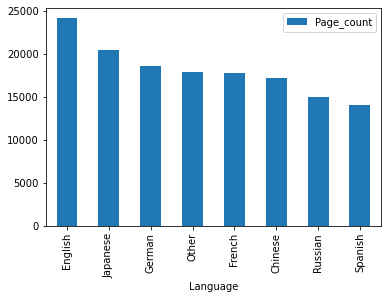

In [19]:
# Count of pages by language:

df1.groupby(by='Language').size().reset_index(name='Page_count').sort_values('Page_count',
                                                                             ascending=False).plot(x='Language',kind='bar')
plt.show()


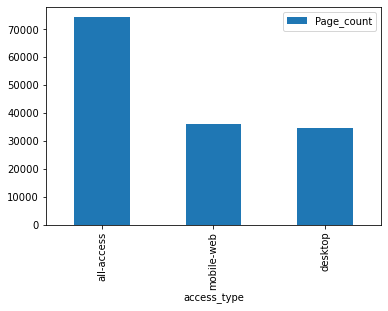

In [20]:
# Count of pages by access_type:

df1.groupby(by='access_type').size().reset_index(name='Page_count').sort_values('Page_count',
                                                                             ascending=False).plot(x='access_type',kind='bar')
plt.show()


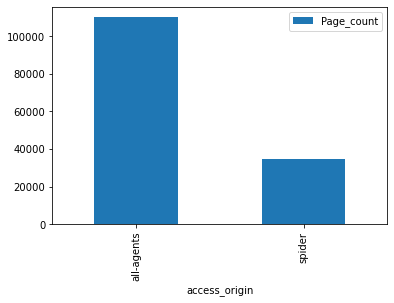

In [21]:
# Count of pages by access_origin:

df1.groupby(by='access_origin').size().reset_index(name='Page_count').sort_values('Page_count',
                                                                             ascending=False).plot(x='access_origin',kind='bar')
plt.show()


In [22]:
# Creating new dataframe(df2) by dropping 'access_type','access_origin'
df2=df1.drop(columns=['access_type','access_origin'])

# Finding the total count of views for each language 
# across all the dates, and taking transpose
df2=df2.groupby(by='Language').agg('sum').reset_index()
df2=df2.T

# Setting the columns
column_header = df2.iloc[0,:].values
df2.columns = column_header
df2 = df2.drop(df2.index[0])

# Setting Date as index
df2.index.name = 'Date'
df2 = df2.reset_index()

df2["Date"] = pd.to_datetime(df2["Date"])
df2 = df2.set_index('Date')
df2.head(3)

,Chinese,English,French,German,Japanese,Other,Russian,Spanish
Date,,,,,,,,
2015-07-01,4144988.0,84712190.0,8458638.0,13260519.0,11863200.0,1490534.0,9463854.0,15278553.0
2015-07-02,4151691.504762,84439240.55,8512986.894737,13080096.2,13620821.433333,1562738.935624,9627678.8,14601214.93688
2015-07-03,4123909.696036,80168433.114286,8186089.376245,12554164.066667,12305430.152381,1477011.058667,8923490.766667,13427900.935409


In [91]:
languages=['Chinese', 'English','French','German','Japanese','Other','Russian', 'Spanish']

for language in languages:
    df2[language]=df2[language].astype(float)

<Figure size 1800x1800 with 0 Axes>

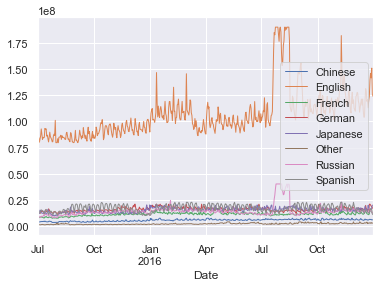

In [94]:
# Plotting different languages:

df2.plot(linewidth=1, markersize=2)
plt.show()

**4.1 Observation from basic plots <a id='obs_basic_plt'></a>**
<br>
- Highest page views are for **English** pages and least for **Spanish**
- Most of the page views are directed towards all-acess type of content
- 'Acess origin': highest is for 'all agents'(i.e both mobile web and browser based)
- Traffic is high for English pages and other languages donot have a very strong trend
- Further processing is required for studying the trend at language level

---
**5. Plotting languages indvidually to study their trend <a id='plt_indi'></a>**

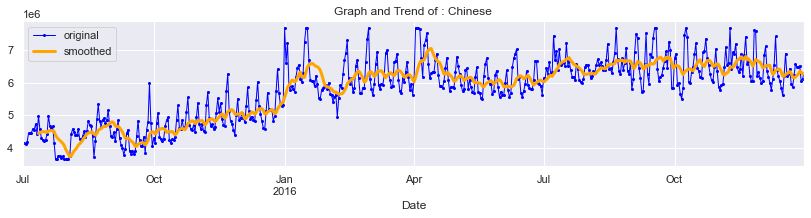

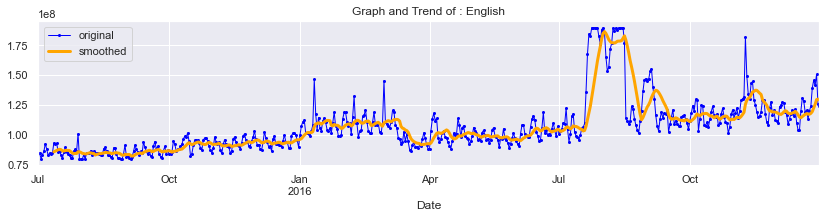

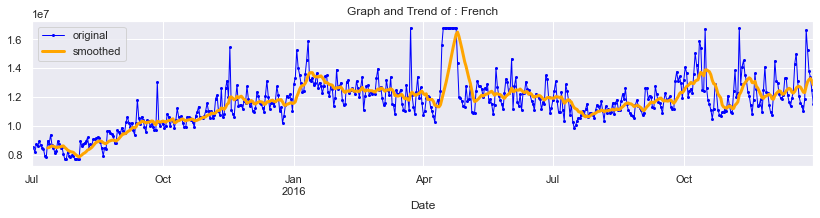

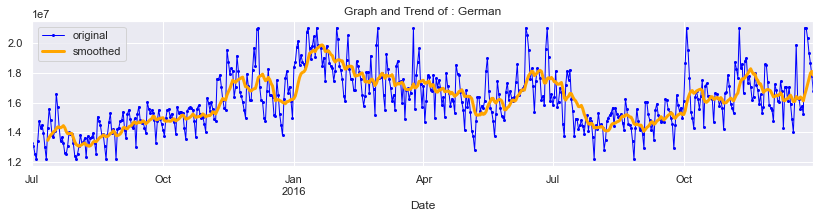

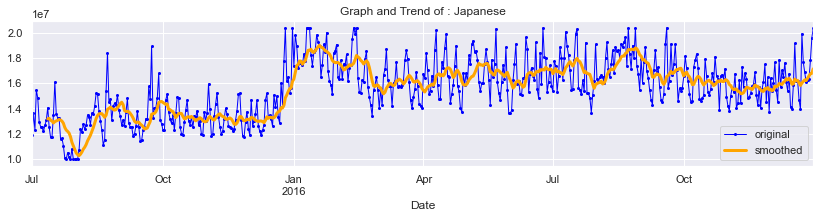

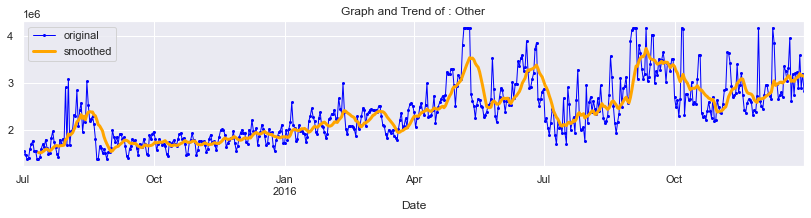

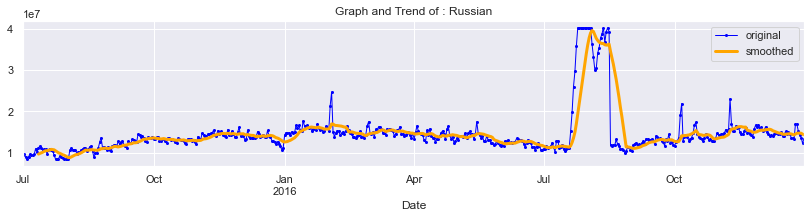

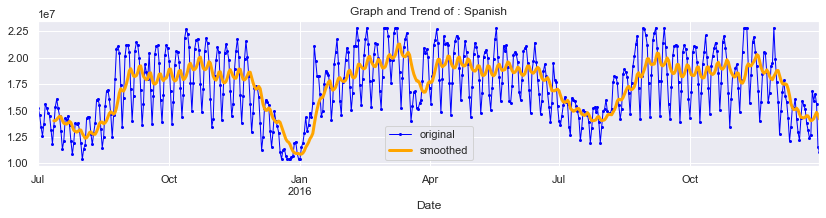

In [25]:
# Code snippet to plot the daily count of pages and moving average for all the languages

languages=['Chinese', 'English','French','German','Japanese','Other','Russian', 'Spanish']

# Values are clipped at 98 and 1st percentile for all the languages
for i,language in enumerate(languages):
    df2[language].clip(upper=df2[language].quantile(0.98), 
                       lower=df2[language].quantile(0.01), inplace=True)
    
    # Creating the plot 
    sns.set(style='darkgrid')
    plt.figure(figsize=(14,25))
    plt.subplot(8,1,i+1)
    
    # Original plot for diff. languages
    df2[language].plot(color='blue', style='-o',
                    linewidth=1, markersize=2,label='original')
    
    # Moving avg. for diff languages
    df2[language].rolling(12, center=False).mean().plot(label='smoothed',color='orange',
                                                       linewidth=3)    
    plt.title(f"Graph and Trend of : {language}")
    
    plt.legend()
    plt.show()

**5.1 Observation based on trend <a id='obs_trend'></a>**
- Most of the languages have upward trend except Russian and Spanish

---
### 6. Checking stationarity <a id='chk_stat'></a>

In [26]:
# Function to calculate the p value of AD Fuller test(Dickey fuller test)

def adf_test(dataset):
    pvalue = sm.tsa.stattools.adfuller(dataset)[1]
    return pvalue

In [27]:
# Code snippet for Dickey fuller test

# Initialisation

def dataframe(dataset):
    
    languages=['Chinese', 'English','French','German','Japanese','Other','Russian', 'Spanish']
    lang=[]
    p=[]
    conc=[]

    for i,language in enumerate(languages):

        p_val=adf_test(dataset[language])
        p.append(p_val.round(3))

        # Comparison with p value
        if(p_val<=0.05):
            conc.append('Stationary')
        else:
            conc.append('Non-Stationary')

    # Creation of DataFrame        
    res=pd.DataFrame({'Language':languages,
                     'P value':p,
                     'Conclusion':conc})

    return res
    

In [28]:
res=dataframe(df2)
res

,Language,P value,Conclusion
0,Chinese,0.479,Non-Stationary
1,English,0.183,Non-Stationary
2,French,0.130,Non-Stationary
3,German,0.150,Non-Stationary
4,Japanese,0.104,Non-Stationary
5,Other,0.069,Non-Stationary
6,Russian,0.001,Stationary
7,Spanish,0.027,Stationary


**6.1 Observation based on ADF Test <a id='obs_adf'></a>**
1. Most of the languages are non-stationary i.e they have a trend and seasonality
2. Russian and Spanish pages have no particular trend or seasonality
3. Decomposition of individual languages gives better insight into their trend and seasonality

---
### 7. Decomposition <a id='decom'></a> 

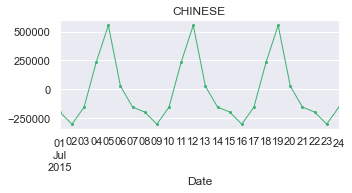

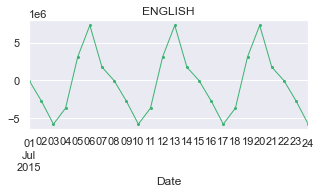

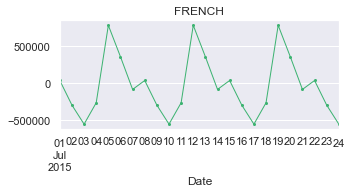

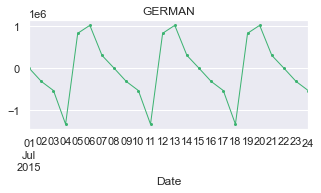

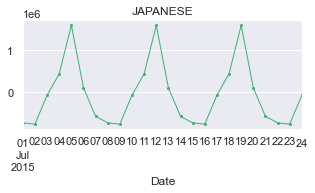

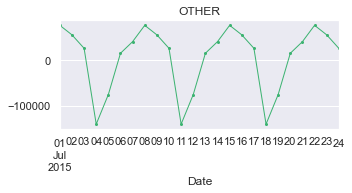

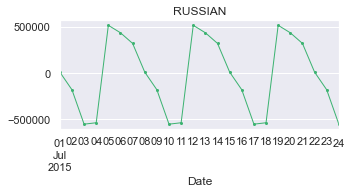

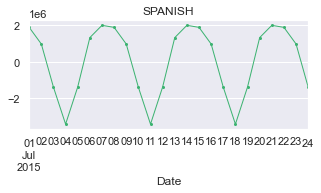

In [29]:
# Function to plot the seasonality of all languages:

languages=['Chinese', 'English','French','German','Japanese','Other','Russian', 'Spanish']

for i,language in enumerate(languages):
    
    model = sm.tsa.seasonal_decompose(df2[language], model='additive')
    
    sns.set(style='darkgrid')
    plt.figure(figsize=(5,2))
    
    # Plotting the seasonality
    model.seasonal[:24].plot(style='-o',linewidth=1, markersize=2,
                     label='Trend',color='mediumseagreen')
    plt.title(languages[i].upper())
    plt.show()
    

**7.1 Observation based on decomposition: <a id='obs_decom'></a>**
- All the languages have clear seasonality    
- Inspite of  Russian and Spanish having clear trend, these languages are stationary

### 8. Differencing <a id='diff'></a> 

- Since different languages have trend and seasonality, they are made stationary using **Differencing** technique
<br>
<br>
- 2 type of differencing is applied: 
    1. To remove trend(diff(1))
    2. To remove seasonality(diff(12))

In [31]:
df3=df2.copy()

languages=['Chinese', 'English','French','German','Japanese','Other','Russian', 'Spanish']

# Doing diff. for each language
for i,language in enumerate(languages):
    
    df3[language] = df2[language].diff(1).diff(12).dropna()

# Calling function to perform ADF test and creating the dataframe
res=dataframe(df3.dropna())

res
    


,Language,P value,Conclusion
0,Chinese,0.0,Stationary
1,English,0.0,Stationary
2,French,0.0,Stationary
3,German,0.0,Stationary
4,Japanese,0.0,Stationary
5,Other,0.0,Stationary
6,Russian,0.0,Stationary
7,Spanish,0.0,Stationary


**Plotting English, Chinese and Russian to observe the stationarity:**

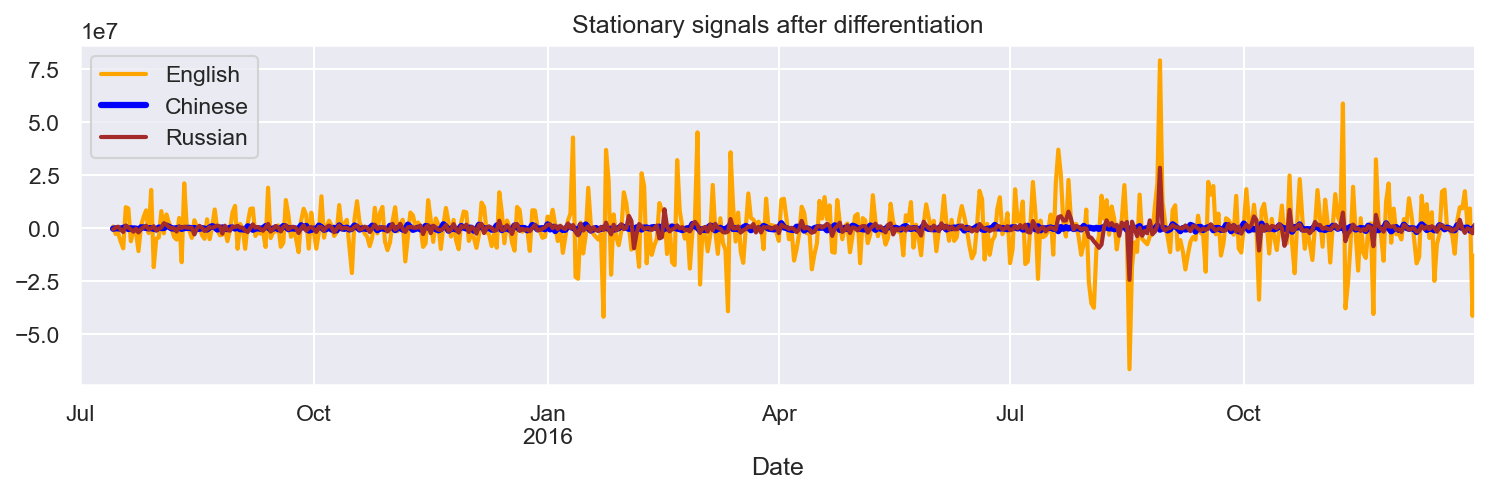

In [32]:
# to set the plot size
plt.figure(figsize=(12, 3), dpi=150)


# English
df3['English'].plot(label='English', color='orange',
                    linewidth=2)

# Chinese
df3['Chinese'].plot(label='Chinese', color='blue',
                    linewidth=3)

# Russian
df3['Russian'].plot(label='Russian', color='brown',
                    linewidth=2)

# adding title to the plot
plt.title('Stationary signals after differentiation')

# adding Label to the x-axis
plt.xlabel('Date')

# adding legend to the curve
plt.legend()

plt.show()

**8.1 Observation <a id='obs_diff'></a>**
- It can be seen that all the languages have been made stationary, by removing trend and seasonality

---
## Forecasting with ARIMA, SARIMAX 

**9. ACF and PACF plot <a id='acf_pacf'></a>**

**Autocorrelation Function (ACF)**
> The autocorrelation function (ACF) is a statistical technique that we can use to identify how correlated the values in a time series are with each other.

<br>
<br>

**Partial Autocorrelation Function (PACF)**
> Partial autocorrelation function captures a “direct” correlation between time series and a lagged version of itself.

**ACF and PACF plots helps to visualise whether the signal is stationary and thereby to ensure that forecasting algorithms like ARIMA, SARIMAX etc. can be applied**

**Note!!**
<br>
Only 3 languages (English, Russian and Chinese) have been analysed since the stastical test has been performed for all the languages

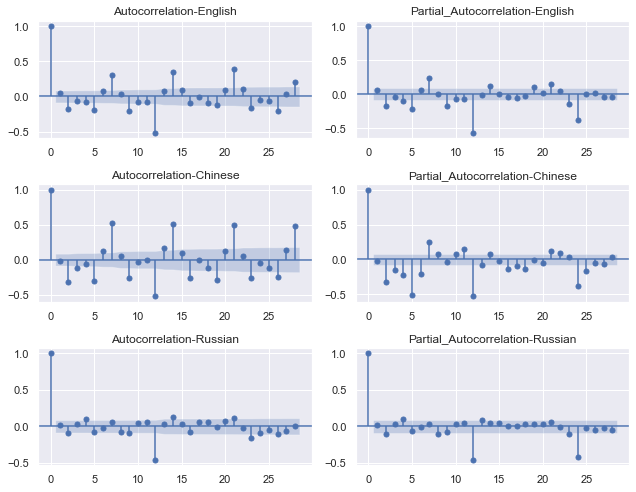

In [33]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9,7))
ax11 = axes[0][0]
ax12 = axes[0][1]

ax21 = axes[1][0]
ax22 = axes[1][1]

ax31 = axes[2][0]
ax32 = axes[2][1]


plot_acf(df3['English'].dropna(),ax=axes[0][0],title='Autocorrelation-English');
plot_pacf(df3['English'].dropna(),ax=axes[0][1],title='Partial_Autocorrelation-English');

plot_acf(df3['Chinese'].dropna(),ax=axes[1][0],title='Autocorrelation-Chinese');
plot_pacf(df3['Chinese'].dropna(),ax=axes[1][1],title='Partial_Autocorrelation-Chinese');

plot_acf(df3['Russian'].dropna(),ax=axes[2][0],title='Autocorrelation-Russian');
plot_pacf(df3['Russian'].dropna(),ax=axes[2][1],title='Partial_Autocorrelation-Russian');

plt.tight_layout()
plt.show()

**9.1 Observation from ACF and PACF plots: <a id='obs_acf_pacf'></a>**
<br>
1. English and Chinese pages have higher corelation and seasonality whereas Russian web pages are immune from seasonality
2. It is evident from the PACF plot that corelation is dependent on recent seasonality and older data doesn't have strong influence on the future views.

---
### 10. Forecasting using ARIMA <a id='arima_for'></a>
<br>
- ARIMA is implemented for English pages only, as the method remains same for other languages




In [34]:
# Extracting English pages 

# Creating separate dataframe for English page
df_eng=pd.DataFrame(data=df2['English'].astype('float').values,index=df2.index)
df_eng.columns=['Actual']
df_eng.dropna(inplace=True)

# Train - Test split
train_eng = df_eng.loc[df_eng.index < df_eng.index[-12]].copy()
# Test---> last 12 values
test_eng = df_eng.loc[df_eng.index >= df_eng.index[-12]].copy()

test_eng.head(3)

,Actual
Date,
2016-12-20,1.282831e+08
2016-12-21,1.191273e+08
2016-12-22,1.207320e+08


In [35]:
# Function to calculate MAPE
def performance(actual, predicted):   
    m = round(mape(actual, predicted), 3)
    return m

---
**10.1 Gridsearch using ARIMA <a id='arima_grid'></a>**
<br>

- Different values of p,q,d are tried using ARIMA and optimised using MAPE

In [36]:
# Initialisation
best_mape=10000
p_best=0
d_best=0
q_best=0

# Different values of p,d,q
for p in range(6):
    for d in range(4):
        for q in range(6):
            
            # Training the model
            model = SARIMAX(train_eng['Actual'], order=(p,d,q))
            model = model.fit(disp=False)
            
            # Forecasting using the model
            test_eng['Pred'] = model.forecast(steps=12)
            
            # Calculating MAPE
            mape_val = performance(test_eng['Actual'], test_eng['Pred'])
            
            if mape_val<best_mape:
                best_mape=mape_val
                p_best=p
                d_best=d
                q_best=q

# Creating the dataframe                
data={'Best_MAPE':best_mape, 'p':p_best, 'd':d_best, 'q':q_best}
pd.DataFrame(data,index=[0])        
            
            

,Best_MAPE,p,d,q
0,0.057,2,2,5


**Plotting using the best values**

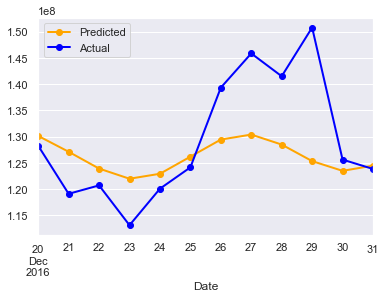

In [39]:
model = SARIMAX(train_eng['Actual'], order=(2, 2, 5)) 
model = model.fit(disp=False)
test_eng['Pred'] = model.forecast(steps=12)

test_eng['Pred'].plot(style='-o',label='Predicted',color='orange',
                    linewidth=2)
test_eng['Actual'].plot(style='-o',label='Actual',color='blue',
                    linewidth=2)

plt.legend()
plt.show()

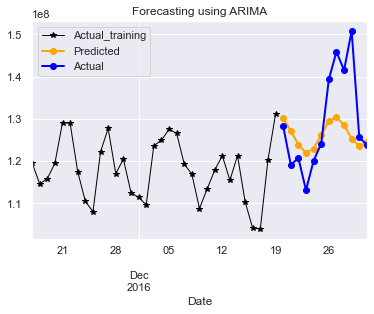

In [98]:
# Forecasting with the actual training data

train_eng['Actual'].tail(33).plot(style='-*',label='Actual_training',color='black',
                    linewidth=1)
test_eng['Pred'].plot(style='-o',label='Predicted',color='orange',
                    linewidth=2)
test_eng['Actual'].plot(style='-o',label='Actual',color='blue',
                    linewidth=2)

plt.title('Forecasting using ARIMA')
plt.legend()
plt.show()

**10.2 Observations from ARIMA forecasting <a id='arima_forecast_obs'></a>**
<br>
- Performs well with forecasting
- MAPE : 5.7%
- Drawback : doesnot considers seasonality as evident from the above plot
- SARIMAX helps to address this concern

---
### 11.Creating model and forecasting with SARIMAX <a id='sarimax_for'></a> 

- SARIMAX is implemented for English pages only, as exogenous variable is available for English pages only

In [85]:
# Creating separate dataframe with endogenous and exogeous data

data={'Endog':df_eng['Actual'].values,
     'Exog':df_exog['Exog'].values}
df_sarimax=pd.DataFrame(data=data,index=df2.index)

# Train - Test split
train_sarimax = df_sarimax.loc[df_sarimax.index < df_sarimax.index[-91]].copy()
# Test---> last 91 values
test_sarimax = df_sarimax.loc[df_sarimax.index >= df_sarimax.index[-91]].copy()

test_sarimax.head(3)

,Endog,Exog
Date,,
2016-10-02,1.183045e+08,0
2016-10-03,1.244932e+08,0
2016-10-04,1.201788e+08,0


In [86]:
# Creating the model
model2 = SARIMAX(train_sarimax['Endog'],exog=train_sarimax['Exog'],order=(2,2,5),seasonal_order=(1,0,1,7),enforce_invertibility=False)
results = model2.fit()

start=len(train_sarimax)
end=len(train_sarimax)+len(test_sarimax)-1

# Forecasting 
exog_forecast = test_sarimax[['Exog']]  
predictions = results.predict(start=start, end=end, exog=exog_forecast).rename('Predictions')

# Finding MAPE
m_val=performance(test_sarimax['Endog'], predictions)

In [89]:
print('MAPE value for SARIMAX with exogenous variable is : {}'.format(m_val))

MAPE value for SARIMAX with exogenous variable is : 0.05


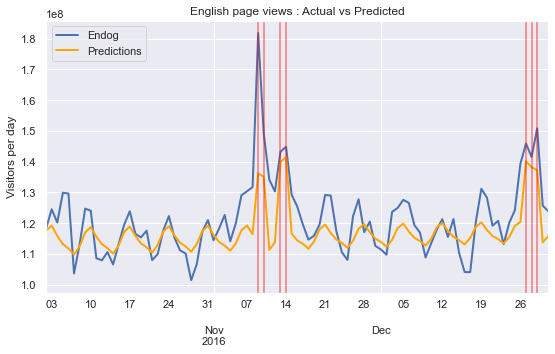

In [47]:
# Plot predictions against known values
title='English page views : Actual vs Predicted'
ylabel='Visitors per day'
xlabel=''

ax = test_sarimax['Endog'].plot(legend=True,figsize=(9,5),linewidth=2,title=title)
predictions.plot(legend=True, color = 'orange',linewidth=2)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

# Plotting verical lines for 'Exog==1' (when campaigning is done)
for x in test_sarimax.query('Exog==1').index: 
    ax.axvline(x=x, color='red', alpha = 0.5);

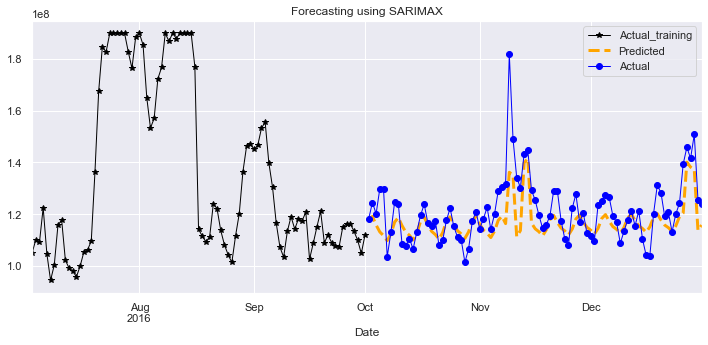

In [104]:

plt.figure(figsize=(12,5))
train_sarimax['Endog'].tail(91).plot(style='-*',label='Actual_training',color='black',
                    linewidth=1)
predictions.plot(style='--',label='Predicted',color='orange',
                    linewidth=3)
test_sarimax['Endog'].plot(style='-o',label='Actual',color='blue',
                    linewidth=1)

plt.title('Forecasting using SARIMAX')
plt.legend()
plt.show()

**11.1 Observations from SARIMAX forecasting <a id='sarimax_obs'></a>**
<br>
- SARIMAX performs better than other forecasting models mainly due to:
    1. It studies seasonality
    2. Captures influence exogenous variable(done campaigning or not)
<br>
- Has the best MAPE, ~5%

In [48]:
df2.to_csv(r'C:\Users\Alfred Paul\OneDrive\Desktop\Scaler_CaseStudies\df2.csv')

---
### 13. Creating a pipeline for working with multiple series <a id='pipe_line'></a>

- Using the pipeline forecasting models are created(ARIMA & SARIMA) for different languages
- Performance is evaluated using MAPE
- **Note**: Since gridsearch is not implemented at language level, due to time complexity concerns, MAPE value is slightly above the threshold for certain languages

In [79]:
# JMJ+

# Function to create the pipeline
def data_pipeline(data,language):

    # Train - Test split
    train_data = data.loc[data.index < data.index[-33]].copy()
    # Test---> last 33 values
    test_data = data.loc[data.index >= data.index[-33]].copy()
    
    # Actual data for testing
    actual=test_data[language].astype('float').values
    
    # ARIMA
    # Creating the model
    model_arima = SARIMAX(train_data[language].astype('float').values, order=(3,2,3))
    model_arima = model_arima.fit(disp=False)
    # Forecasting using the ARIMA
    pred_arima=model_arima.forecast(steps=33)
    # Calculating ARIMA-MAPE
    mape_val_arima = performance(actual, pred_arima)

    # SARIMA
    # Creating the model
    model_sarima = SARIMAX(train_data[language].astype('float').values, order=(3, 2, 3), seasonal_order=(1,1,1,12)) 
    model_sarima = model_sarima.fit(disp=False)
    # Forecasting using the AARIMA
    pred_sarima=model_sarima.forecast(steps=33)
    # Calculating SARIMA-MAPE
    mape_val_sarima = performance(actual, pred_sarima)
    
    # Preparing the dataframe
    d={'Language':language, 'MAPE(ARIMA)':mape_val_arima,'MAPE(SARIMA)':mape_val_sarima}
    df_combined=pd.DataFrame(data=d,index=[0])
    return df_combined

In [78]:
# Printing the result for each language:

languages=['Chinese', 'English','French','German','Japanese','Other','Russian', 'Spanish']

for lang in languages:
    df_comb=data_pipeline(df2,lang)     
    print(df_comb)
    print('='*51)

  Language  MAPE(ARIMA)  MAPE(SARIMA)
0  Chinese        0.056         0.055
  Language  MAPE(ARIMA)  MAPE(SARIMA)
0  English        0.061         0.083
  Language  MAPE(ARIMA)  MAPE(SARIMA)
0   French        0.097         0.091
  Language  MAPE(ARIMA)  MAPE(SARIMA)
0   German        0.137         0.105
   Language  MAPE(ARIMA)  MAPE(SARIMA)
0  Japanese        0.084         0.119
  Language  MAPE(ARIMA)  MAPE(SARIMA)
0    Other        0.108         0.158
  Language  MAPE(ARIMA)  MAPE(SARIMA)
0  Russian        0.144         0.119
  Language  MAPE(ARIMA)  MAPE(SARIMA)
0  Spanish        0.265         0.196


---
### 14. Insights <a id='ins'></a> 


- Web page traffic is highest for English and oher pages have relatively lower volume
<br>

- Most of the languages have clear trend and seasonality
<br>

- SARIMAX gives the best result in terms of MAPE
<br>

- Campaigning has a positive influence on the traffic
<br>

- Care should be given to Spanish and Russian pages while creating the data pipeline as they are already stationary, unlike other languages which requires differencing


### 15. Reccomendations <a id='rec'></a> 

- As campaigning has strong correlation with the web traffic, campaigning could be extended to other languages, regional languages which have a large population (Eg:Chinese)
<br>

- As most of the traffic is observed in night and during weekends(based on forecast from fb prophet), ads during these hour would enjoy higher CTR(click through rate)
<br>
- Pricing of ads should be based on 
    1. View count
    2. Language
    3. YoY growth (observed from the forecast)
    4. Seasonality (hourly,daily,monthly & yearly variations should be considered)
    
- Forecasting very large periods reduces the confidence, hence most of the forecast should be given for ~6 months to attract more business


---
### 16. Questionnaire: <a id='ques'></a>

**1. Defining the problem statements and where can this and modifications of this be used?**
 
- Analyse the per page view pattern of users for different wikipedia page for 550 days

- Forecasting the ad views based on the historical data so as to optimise the ad positioning and thereby improving the client service and generating more revenue.
<br>
--- 
**2. Write 3 inferences you made from the data visualizations**

- Highest page views are for **English** pages and least for **Spanish**
- Most of the page views are directed towards all-acess type of content
- 'Acess origin': highest is for 'all agents'(i.e both mobile web and browser based)
- Traffic is high for English pages and other languages donot have a very strong trend
<br>
---
**3. What does the decomposition of series do?**

- Trend and seasonality of the underlying time series data can be obtained visually
<br>
---
**4. What level of differencing gave you a stationary series?**
- 2 types of differencing to .diff(1), .diff(12) (to handle trend and seasonality) were carried out
<br>
---
**5. Difference between arima, sarima & sarimax.**

- ARIMA is an acronym for “autoregressive integrated moving average", basic forecasting technique based on the a. previous set of points, b. previous errors and c. Differencing the points(to achieve stationarity). Seasonality is not learned in this model
<br>
- SARIMA is used on data sets that have seasonal cycles without exogenous variables
<br>
- SARIMAX is used on data sets that have seasonal cycles along with exogenous variables
<br>

---
**6. Compare the number of views in different languages**
- Highest page views are for **English** pages and least for **Spanish**
<br>
---
**7. What other methods other than grid search would be suitable to get the model for all languages?**
- **Random search**. A random search is a different approach in which the possible hyper-parameters are randomly chosen and not predefined as in the grid search approach.

### 12. Forecasting using Facebook prophet <a id='prophet'></a>

**Note!!!**
<br>
The implementation for Facebook prophet is done in Colab file due to the issues associated with installation

### JMJ+